# Machine Learning Project
Iris, Julien, Chloé


Dataset : Cybersecurity Intrusion Detection from Kaggle

## Descriptive analysis of our data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv("cybersecurity_intrusion_data.csv")

data.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [6]:
data.describe()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


In [7]:
data.apply(lambda x: x.unique(), axis=0)

session_id             [SID_00001, SID_00002, SID_00003, SID_00004, S...
network_packet_size    [599, 472, 629, 804, 453, 815, 653, 406, 608, ...
protocol_type                                           [TCP, UDP, ICMP]
login_attempts               [4, 3, 5, 2, 6, 9, 8, 1, 7, 10, 12, 13, 11]
session_duration       [492.9832634426563, 1557.9964611204384, 75.044...
encryption_used                                          [DES, AES, nan]
ip_reputation_score    [0.606818080396889, 0.3015689675960893, 0.7391...
failed_logins                                         [1, 0, 2, 3, 4, 5]
browser_type                    [Edge, Firefox, Chrome, Unknown, Safari]
unusual_time_access                                               [0, 1]
attack_detected                                                   [1, 0]
dtype: object

In [8]:
data.isnull().sum()

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64

So we have :  
- `11 features`
- numeric columns : `network_packet_size, login_attempts, session_duration, ip_reputation_score, failed_logins, unusual_time_access, attack_detected`
- categorical `columns : session_id, protocol_type, encryption_used, browser_type`
- target : `attack_detected`

only `encryption_used` has missing values

| Column | Description | Type | Example Values |
| :--- | :--- | :--- | :--- |
| session_id | Unique identifier for each network session | string | SID_00001 |
| network_packet_size | Average packet size during the session | int | 472 |
| protocol_type | Network protocol used | categorical | TCP, UDP, ICMP |
| login_attempts | Number of login attempts made during session | int | 4 |
| session_duration | Total session length (in seconds) | float | 492.98 |
| encryption_used | Encryption algorithm applied | categorical | DES, AES, Unknown |
| ip_reputation_score | IP trust score between 0 (bad) and 1 (good) | float | 0.60 |
| failed_logins | Number of failed login attempts | int | 1 |
| browser_type | Client browser used during session | categorical | Chrome, Firefox |
| unusual_time_access | Indicates off-hour access (1) or normal (0) | binary | 0 / 1 |
| attack_detected | Target variable: 1 = attack detected, 0 = normal | binary | 0 / 1 |

**Data Quality Assessment :**  
**Accuracy** : All variables seems to be logical  
**Completeness** : Like we said befors, only `encryption_used` has missing values  
**Consistency** : Strong internal consistency, categorical columns don't have many different values  
**Timeliness** : the only time-based feature is `unusual_time_access` and it's just binary values  
**Believability** : Values appear internally coherent  
**Interpretability** : Columns follow clear naming conventions

C:\Users\chloe\AppData\Local\Temp\ipykernel_28168\1927058148.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


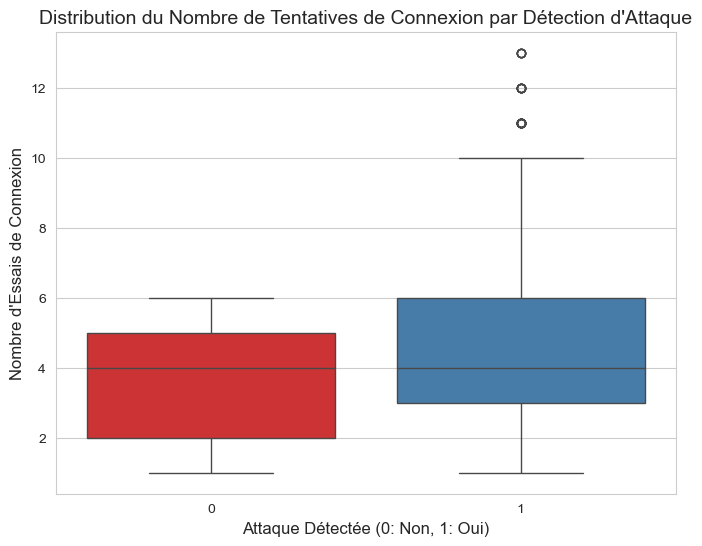

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

sns.boxplot(
    x='attack_detected', 
    y='login_attempts', 
    data=data, 
    palette='Set1'
)

plt.title("Distribution du Nombre de Tentatives de Connexion par Détection d'Attaque", fontsize=14)
plt.xlabel("Attaque Détectée (0: Non, 1: Oui)", fontsize=12)
plt.ylabel("Nombre d'Essais de Connexion", fontsize=12)
plt.show()

C:\Users\chloe\AppData\Local\Temp\ipykernel_28168\734284914.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


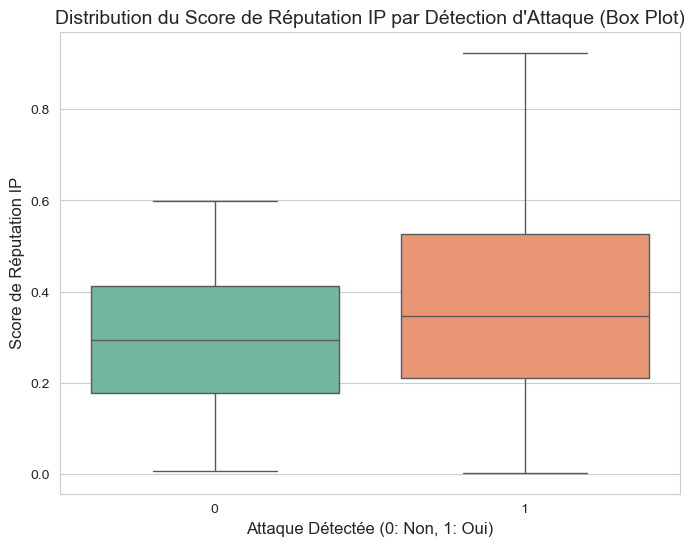

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

sns.boxplot(
    x='attack_detected', 
    y='ip_reputation_score', 
    data=data, 
    palette='Set2'
)

# Customize labels and title
plt.title("Distribution du Score de Réputation IP par Détection d'Attaque (Box Plot)", fontsize=14)
plt.xlabel("Attaque Détectée (0: Non, 1: Oui)", fontsize=12)
plt.ylabel("Score de Réputation IP", fontsize=12)
plt.show()

C:\Users\chloe\AppData\Local\Temp\ipykernel_28168\4171243091.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


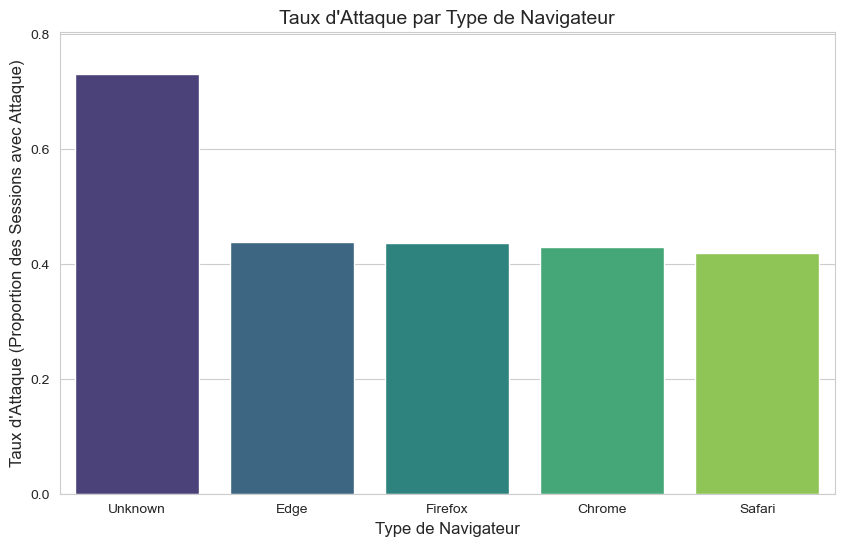

In [11]:
attack_rate_by_browser = data.groupby('browser_type')['attack_detected'].mean().reset_index()
attack_rate_by_browser.columns = ['browser_type', 'attack_rate']

attack_rate_by_browser = attack_rate_by_browser.sort_values(by='attack_rate', ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(
    x='browser_type', 
    y='attack_rate', 
    data=attack_rate_by_browser, 
    palette='viridis' 
)

plt.title("Taux d'Attaque par Type de Navigateur", fontsize=14)
plt.xlabel("Type de Navigateur", fontsize=12)
plt.ylabel("Taux d'Attaque (Proportion des Sessions avec Attaque)", fontsize=12)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0]) 
plt.ylim(0, attack_rate_by_browser['attack_rate'].max() * 1.1) 
plt.show()

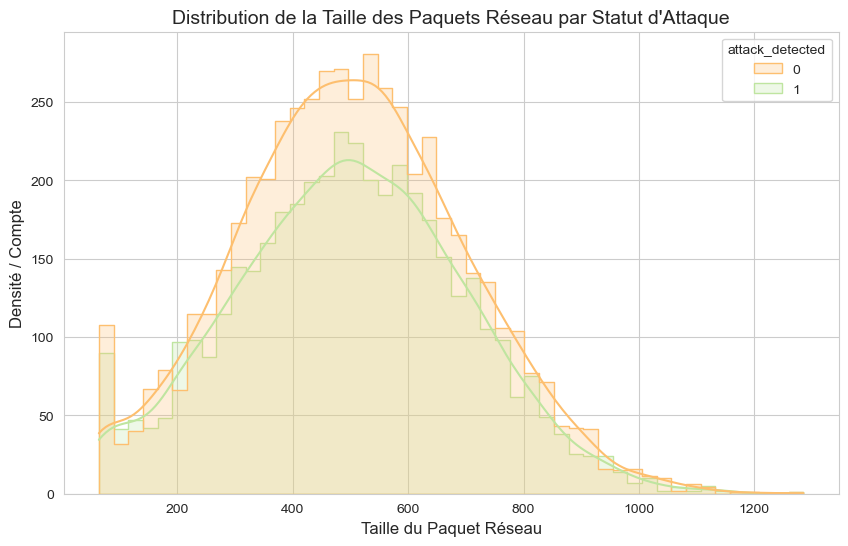

In [12]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.histplot(
    data=data, 
    x='network_packet_size', 
    hue='attack_detected', 
    kde=True, 
    palette='Spectral',
    element='step' 
)

plt.title("Distribution de la Taille des Paquets Réseau par Statut d'Attaque", fontsize=14)
plt.xlabel("Taille du Paquet Réseau", fontsize=12)
plt.ylabel("Densité / Compte", fontsize=12)
plt.show()

Let's prepare the data to calculate the correlation matrix

In [ ]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].mean(), inplace=True)


C:\Users\chloe\AppData\Local\Temp\ipykernel_28168\3867710097.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
C:\Users\chloe\AppData\Local\Temp\ipykernel_28168\3867710097.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [18]:
data_encoded = data.copy()

label_encoders = {}
for col in data_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

data_encoded.drop_duplicates(inplace=True)
X = data_encoded.drop(columns=['attack_detected'])
y = data_encoded['attack_detected']

In [19]:
correlation_matrix = data_encoded.corr()

correlations = correlation_matrix['attack_detected'].drop('attack_detected')

correlations_sorted = correlations.abs().sort_values(ascending=False)

print("Correlation of each variable with 'attack_detected'")
print(correlations.reindex(correlations_sorted.index).to_markdown(numalign="left", stralign="left"))

Correlation of each variable with 'attack_detected'
|                     | attack_detected   |
|:--------------------|:------------------|
| failed_logins       | 0.363726          |
| login_attempts      | 0.27732           |
| ip_reputation_score | 0.21154           |
| browser_type        | 0.0841672         |
| session_duration    | 0.0416019         |
| protocol_type       | 0.01389           |
| unusual_time_access | 0.00865152        |
| encryption_used     | 0.0083064         |
| network_packet_size | -0.00679795       |
| session_id          | -0.00247341       |


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, digits=4)

print("-" * 50)
print(f"Accuracy du modèle Random Forest : {accuracy_rf:.4f}")
print("\nRapport de Classification :\n", report_rf)
print("-" * 50)

--------------------------------------------------
Accuracy du modèle Random Forest : 0.8842

Rapport de Classification :
               precision    recall  f1-score   support

           0     0.8289    0.9962    0.9049      1055
           1     0.9938    0.7456    0.8520       853

    accuracy                         0.8842      1908
   macro avg     0.9113    0.8709    0.8784      1908
weighted avg     0.9026    0.8842    0.8812      1908

--------------------------------------------------


In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 300, 500],
    'max_depth': [10, 20,30, None],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 3 ],
    'max_features': ['sqrt']
}

grid_search = GridSearchCV(
    estimator = rf_model,
    param_grid=param_grid,
    scoring='recall',
    cv=5,    
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train,y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [100, 300, 500]},
             scoring='recall', verbose=1)

In [27]:
best_parametre = grid_search.best_params_
print(best_parametre)
print(grid_search.best_score_)

{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
0.7707384619347968


Overall, the descriptive analysis gave us a solid understanding of the dataset. We identified the structure of the data, detected categorical variables, checked data quality issues such as duplicates and missing values, and explored the distribution of important features. These steps confirm that the dataset is clean and ready for further preprocessing and model development. This analysis also highlights early signs of differences between normal and malicious traffic, which will be useful for building accurate intrusion detection models.